In [1]:
import numpy as np
import matplotlib.pyplot as plt

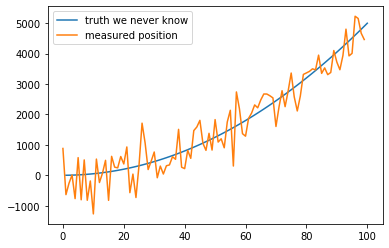

In [5]:
# 模拟真实数据
t = np.linspace(1,100,100)
position = 0.5 * t ** 2

position_measure = position+np.random.normal(0,500,size=t.shape[0])

plt.plot(t,position,label='truth we never know')
plt.plot(position_measure, label='measured position')
plt.legend()
plt.show()

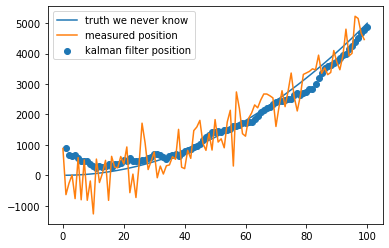

In [8]:
# 第一次估计，就用第一个观测值估计
predicts_kalman = [position_measure[0]]
position_predict = 881

measure_var = 1000
predict_var = 100
Q_var = 50

for i in range(1,t.shape[0]):
    
    dv = position[i] - position[i-1] + np.random.normal(0,50)
    position_predict = position_predict + dv
    predict_var = predict_var+Q_var
    
    position_predict = position_predict*measure_var/(predict_var+measure_var) + position_measure[i]*predict_var/(predict_var+measure_var)
    predict_var = predict_var*measure_var/(predict_var+measure_var)**2
    predicts_kalman.append(position_predict)
    
plt.scatter(t,predicts_kalman,label='kalman filter position')
plt.plot(t,position,label='truth we never know')
plt.plot(position_measure, label='measured position')
plt.legend()
plt.show()
    